In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N= 50 # data points
X= np.linspace(0,10,N)
Y= 0.5*X+ np.random.randn(N)
# adding outliers 
Y[-1]+=30
Y[-2]+=30

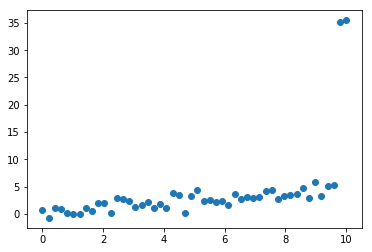

In [3]:
plt.scatter(X,Y)
plt.show()

In [4]:
# weights bias term
X=np.vstack([np.ones(N),X]).T
w_maxlike= np.linalg.solve(X.T.dot(X),X.T.dot(Y))
yhat_ml=X.dot(w_maxlike)

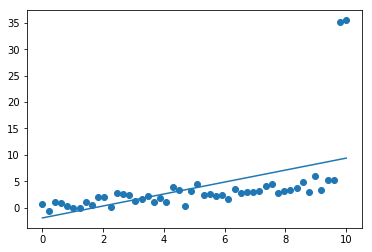

In [11]:
# Plotting
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],yhat_ml)
plt.show()

In [7]:
# l2 regularization with penalty

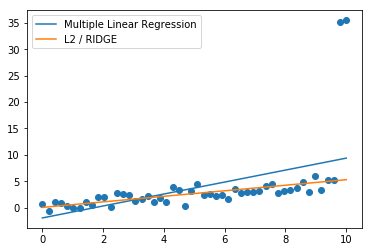

In [12]:
l2=1000
w_map=np.linalg.solve(l2*np.eye(2) +X.T.dot(X),X.T.dot(Y))
yhat_map=X.dot(w_map)
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],yhat_ml,label="Multiple Linear Regression")
plt.plot(X[:,1],yhat_map,label ="L2 / RIDGE")
plt.legend()
plt.show()

# Gradient Descent

In [14]:
N= 10
D= 3
X=np.zeros((N,D))
X[:,0]=1
X[:5,1]=1
X[5:,2]=1

In [16]:
Y=np.array([0]*5+[1]*5)

In [18]:
cost=[]
w=np.random.randn(D)/np.sqrt(D)
learn_rate=.001


In [20]:
for i in range(1000):
    Yhat=X.dot(w)
    delta=Yhat-Y
    w= w-learn_rate*X.T.dot(delta)
    mse=delta.dot(delta)/N
    cost.append(mse)

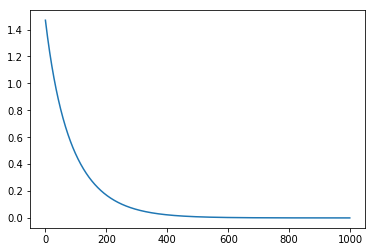

In [33]:
plt.plot(cost)
plt.show()

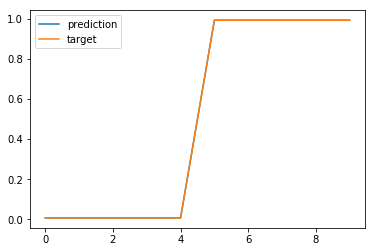

In [29]:
plt.plot(Yhat,label="prediction")
plt.plot(Yhat,label="target")
plt.legend()
plt.show()

# Lasso Regression

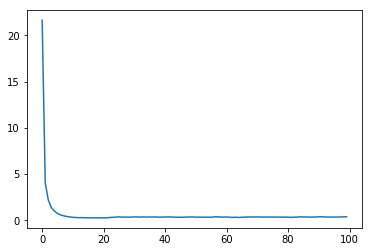

In [40]:
N=50
D=50 # fat matrix as n and d are equal
X=(np.random.random((N,D))-.5)*10
true_w=np.array([1,.5,-.5]+[0]*(D-3))
Y=X.dot(true_w)+np.random.randn(N)*.5
cost=[]
w=np.random.randn(D)/np.sqrt(D)
learning_rate=0.001
l1=10
for t in range(100):
    Yhat=X.dot(w)
    delta=Yhat-Y
    w=w-learning_rate*(X.T.dot(delta)+l1*np.sign(w))
    mse=delta.dot(delta)/N
    cost.append(mse)
plt.plot(cost)
plt.show()

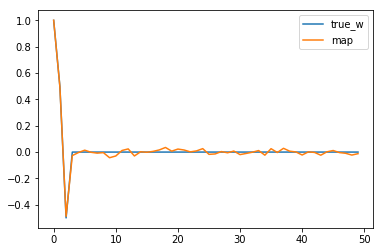

In [41]:
plt.plot(true_w,label='true_w')
plt.plot(w,label='map')
plt.legend()
plt.show()